In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**VERİ SETİ**

In [2]:
file_path = '/content/drive/MyDrive/dataset1/common_dataset_touch_features_offset.xlsx'

In [3]:
import pandas as pd

data = pd.read_excel(file_path)

In [4]:
data = data.drop(columns='user_id')

In [5]:
data = data.drop(columns='touch')
data = data.drop(columns='finger')
data = data.drop(columns='palm')
data = data.drop(columns='fist')

In [6]:
#Veri setinin genel bilgileri
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Columns: 3201 entries, touch_type to 3200
dtypes: int64(3201)
memory usage: 50.2 MB
None


In [7]:
#touch_type dağılımı
print(data['touch_type'].value_counts())

touch_type
0    1144
1     123
8     123
2     112
9     103
7      99
6      92
3      90
5      88
4      82
Name: count, dtype: int64


In [8]:
data.columns = data.columns.astype(str)

In [9]:
#İlk birkaç satırı
print(data.head())

   touch_type   1  2   3   4   5   6   7   8   9  ...  3191  3192  3193  3194  \
0           0   4  0  12 -16  -2   0 -25   6  -6  ...   -51     4     1     3   
1           0 -52 -2  17   1  15  -9 -22 -17  -8  ...   -36    -1    49     6   
2           0   2  7  14  -5  16  12 -17 -22 -13  ...     1    55    54   -51   
3           0   0  6  10   8  -2   2   1  -4   9  ...     1     2    28     2   
4           0   2  5   3   0  17  10 -19 -19 -13  ...   -25    51    -6   -45   

   3195  3196  3197  3198  3199  3200  
0   -42     2     3    61     2    -1  
1   -58     8    49    63    47     6  
2   -26    55    56     9    55    52  
3     1     9    55    53    -7    51  
4    -4    61    48    60    46     5  

[5 rows x 3201 columns]


**default decision tree model**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#  'touch_type'
X = data.drop(columns='touch_type')
y = data['touch_type']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
#Eğitim seti üzerinde tahmin
y_pred_train = dt_default.predict(X_train)

#Eğitim seti için performans
print("Eğitim Seti İçin Karar Ağacı Sınıflandırıcısı Model Performansı:")
print(classification_report(y_train, y_pred_train))

Eğitim Seti İçin Karar Ağacı Sınıflandırıcısı Model Performansı:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00        68
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00        68
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        84
           8       1.00      1.00      1.00        94
           9       1.00      1.00      1.00        86

    accuracy                           1.00      1644
   macro avg       1.00      1.00      1.00      1644
weighted avg       1.00      1.00      1.00      1644



In [16]:
#Test seti üzerinde tahmin
y_pred_test = dt_default.predict(X_test)

# Test seti için performans
print("Test Seti İçin Karar Ağacı Sınıflandırıcısı Model Performansı:")
print(classification_report(y_test, y_pred_test))

Test Seti İçin Karar Ağacı Sınıflandırıcısı Model Performansı:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       231
           1       0.41      0.50      0.45        18
           2       0.33      0.30      0.32        20
           3       0.06      0.05      0.05        22
           4       0.00      0.00      0.00        20
           5       0.38      0.25      0.30        20
           6       0.32      0.40      0.36        20
           7       0.29      0.27      0.28        15
           8       0.56      0.48      0.52        29
           9       0.26      0.29      0.28        17

    accuracy                           0.63       412
   macro avg       0.35      0.34      0.34       412
weighted avg       0.61      0.63      0.62       412



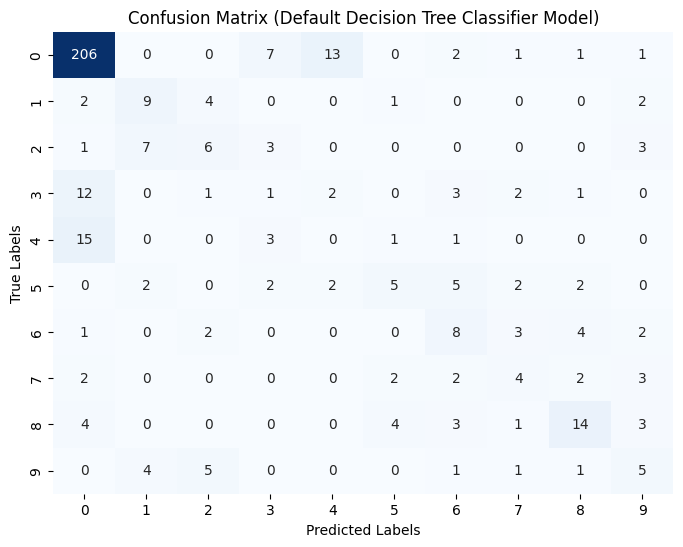

In [17]:
cm_default = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Default Decision Tree Classifier Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**hyperparameter optimization**

In [18]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,5,7,9, 10],
    'min_samples_split': [2, 5,7,8,9, 10,11,15,20],
    'min_samples_leaf': [1, 2,3,4,5]
}

In [19]:
dt_optimized = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_optimized, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 7, 8, 9, 10, 11, 15, 20]},
             scoring='accuracy', verbose=2)

In [20]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



In [21]:
# En iyi model ile tahmin yapma
y_pred_train_optimized = best_model.predict(X_train)
y_pred_test_optimized = best_model.predict(X_test)

In [22]:
# Eğitim seti ve test seti için performanslar
print("\nOptimized Decision Tree Classifier Model Performance:")
print("Best Parameters:", best_params)

print("\nEğitim Seti İçin Karar Ağacı Sınıflandırıcısı Model Performansı:")
print(classification_report(y_train, y_pred_train_optimized))

print("\nTest Seti İçin Karar Ağacı Sınıflandırıcısı Model Performansı:")
print(classification_report(y_test, y_pred_test_optimized))


Optimized Decision Tree Classifier Model Performance:
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 11}

Eğitim Seti İçin Karar Ağacı Sınıflandırıcısı Model Performansı:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       913
           1       0.77      0.90      0.83       105
           2       0.83      0.64      0.72        92
           3       0.64      0.31      0.42        68
           4       0.53      0.16      0.25        62
           5       0.74      0.57      0.64        68
           6       0.79      0.67      0.72        72
           7       0.86      0.83      0.85        84
           8       0.75      0.94      0.83        94
           9       0.83      0.73      0.78        86

    accuracy                           0.85      1644
   macro avg       0.76      0.67      0.70      1644
weighted avg       0.83      0.85      0.83      1644


Test Seti İçi

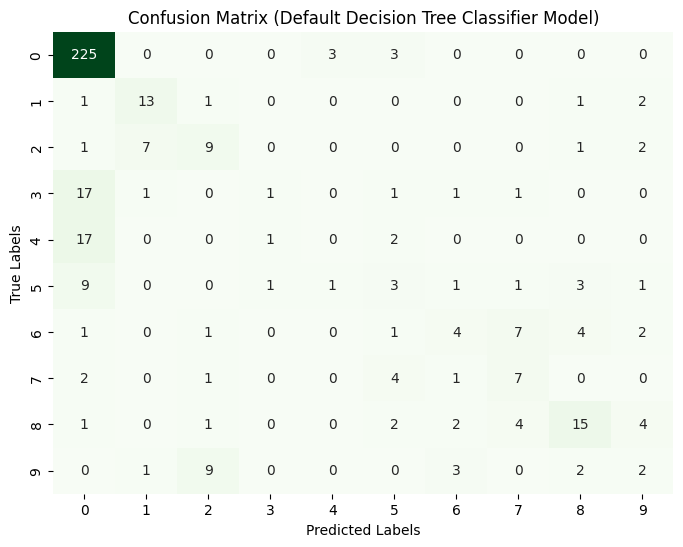

In [80]:
cm_test = confusion_matrix(y_test, y_pred_test_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix - Optimized Decision Tree')
plt.title('Confusion Matrix (Default Decision Tree Classifier Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**PCA**

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [64]:
X = data.drop(columns='touch_type')
y = data['touch_type']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# PCA modelini oluşturma
pca = PCA(n_components=0.95)  # Varyansın %95'ini koruyacak şekilde bileşenleri seç
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [68]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
y_pred = dt.predict(X_test_pca)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree modelinin test seti üzerinde doğruluğu: {accuracy:.2f}")

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Decision Tree modelinin test seti üzerinde doğruluğu: 0.61
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       231
           1       0.30      0.33      0.32        18
           2       0.31      0.25      0.28        20
           3       0.13      0.09      0.11        22
           4       0.12      0.10      0.11        20
           5       0.44      0.55      0.49        20
           6       0.11      0.10      0.11        20
           7       0.13      0.20      0.16        15
           8       0.56      0.34      0.43        29
           9       0.17      0.18      0.17        17

    accuracy                           0.61       412
   macro avg       0.31      0.31      0.30       412
weighted avg       0.60      0.61      0.60       412



**n_components=860**

In [75]:
pca = PCA(n_components=860)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)



y_pred = dt.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree modelinin test seti üzerinde doğruluğu: {accuracy:.2f}")

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Decision Tree modelinin test seti üzerinde doğruluğu: 0.65
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       231
           1       0.27      0.22      0.24        18
           2       0.35      0.40      0.37        20
           3       0.20      0.14      0.16        22
           4       0.15      0.10      0.12        20
           5       0.55      0.55      0.55        20
           6       0.29      0.35      0.32        20
           7       0.17      0.27      0.21        15
           8       0.54      0.48      0.51        29
           9       0.33      0.29      0.31        17

    accuracy                           0.65       412
   macro avg       0.37      0.37      0.37       412
weighted avg       0.64      0.65      0.64       412

